This notebook is build from [here](https://www.kaggle.com/loveunk/kaggle-digit-recognizer-keras-cnn-100-accuracy)

In [1]:
# 导入必要的libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


In [22]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten

def lenet_5():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))

    model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    return model

In [10]:
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('../data/train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

X_train = X_train / 255.0

print(X_train.shape)

# Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)

# Reshape the input
X_dev = X_dev.values.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.values.reshape(X_val.shape[0], 28, 28, 1)

(42000, 784)


In [9]:
model_path = "../saved_models/model-0.9968.h5"

model = lenet_5()
model.load_weights(model_path)

1260/1260 [==============================] - 0s 176us/sample


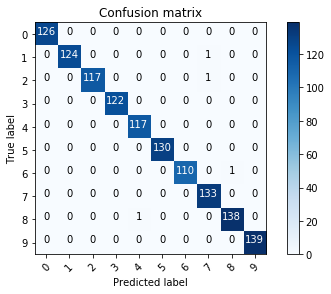

In [31]:
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_val, verbose=1)
y_preds = np.argmax(y_pred_probs, axis=1)

# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_preds) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [35]:
# 显示一些错误结果，及预测标签和真实标签之间的不同
errors = (y_preds - Y_val != 0)
Y_pred_errors = y_preds[errors]
Y_true_errors = Y_val[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_probs,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_probs, Y_true_errors, axis=1))



# # Difference between the probability of the predicted label and the true label
# delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# # Sorted list of the delta prob errors
# sorted_dela_errors = np.argsort(delta_pred_true_errors)

# # Top 6 errors 
# most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
# display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
